## Bibliotek

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

## Funksjoner

In [281]:
def read_file(path: str) -> np.ndarray:
    """
    0:  FREQ (CM-1)
    1:  WAVLEN (MICRN)
    2:  PATH THERMAL (CM-1)
    3:  PATH THERMAL (MICRN)
    4:  SURFACE EMISSION (CM-1)
    5:  SURFACE EMISSION (MICRN)
    6:  SURFACE REFLECTED (CM-1)
    7:  SURFACE REFLECTED (MICRN)
    8:  TOTAL RADIANCE (CM-1)
    9:  TOTAL RADIANCE (MICRN)
    10: INTEGRAL (CM-1)
    11: TOTAL TRANS
    """
    with open(path) as file:
        lines = [line.rstrip() for line in file]

    i: int = 0
    rows: list = []

    while (i < len(lines)):
        if "RADIANCE(WATTS/CM2-STER-XXX)" in lines[i]:
            i = i + 4
            
            for _ in range(50):
                components: list[str] = lines[i].split()
                numbers: list[float] = [float(x) for x in components]
                rows.append(numbers)
                i = i + 1

        i = i + 1

    return np.array(rows)

def create_custom_cmap(base_cmap, start=0.0, stop=1.0, n_colors=256):
    base = plt.get_cmap(base_cmap)
    colors = base(np.linspace(start, stop, n_colors))
    return mcolors.LinearSegmentedColormap.from_list(f'{base_cmap}_custom', colors)

## Dataanalyse

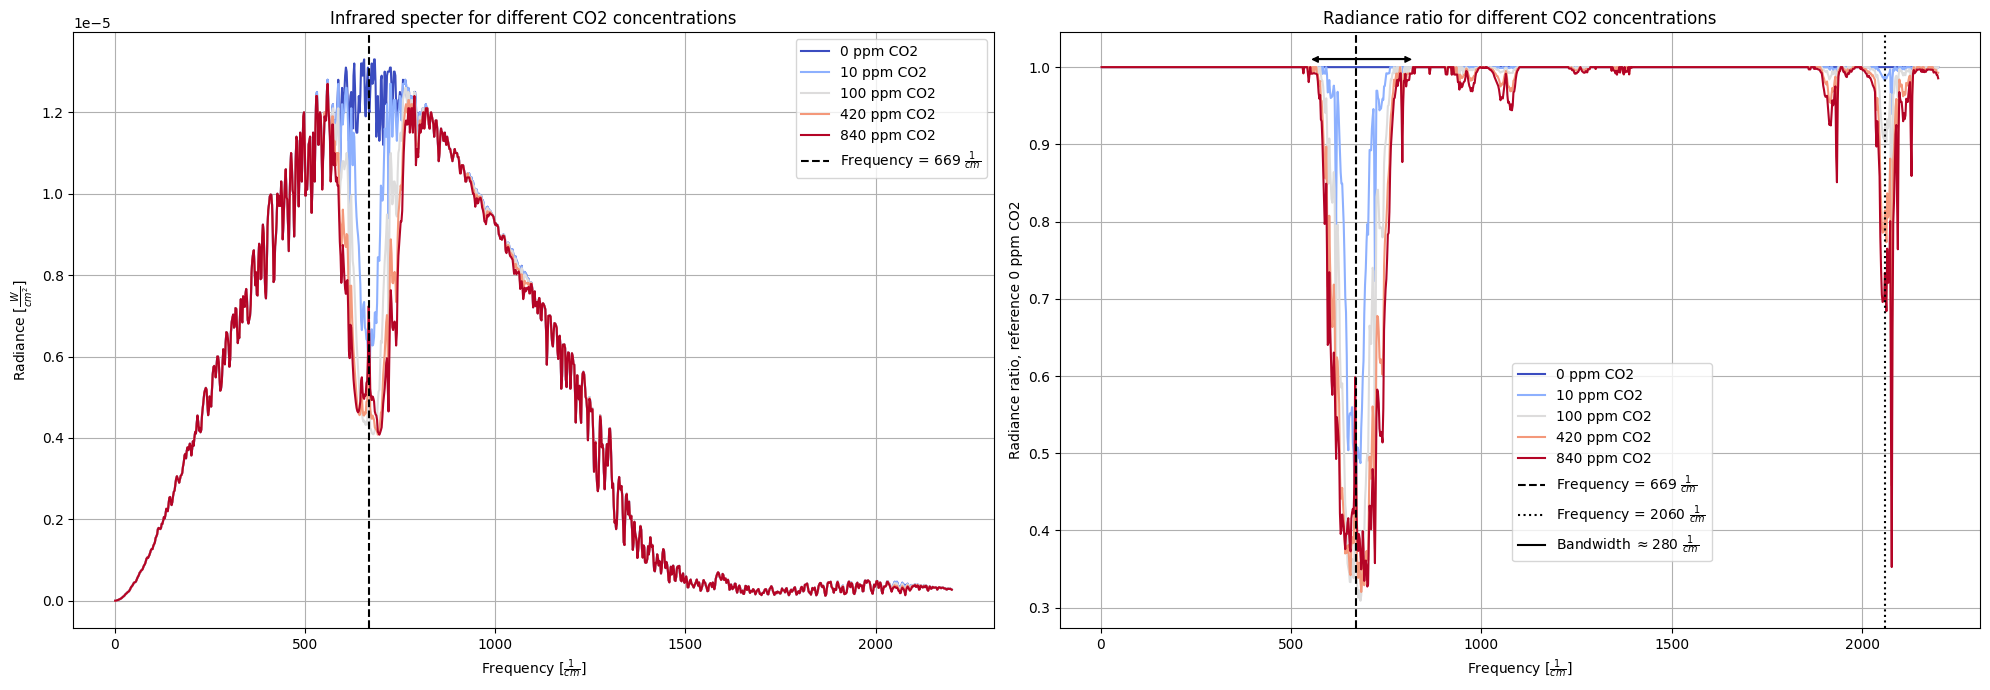

In [282]:
CO2paths: list[list[str]] = [
    ['modtran/modtran0.txt', '0 ppm CO2'],
    ['modtran/modtran10.txt', '10 ppm CO2'],
    ['modtran/modtran100.txt', '100 ppm CO2'],
    ['modtran/modtran420.txt', '420 ppm CO2'],
    ['modtran/modtran840.txt', '840 ppm CO2'],
]


cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=len(CO2paths) - 1)

CO2_0ppm: np.ndarray = read_file('modtran/modtran0.txt')
f1 = 545
f2 = 825

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# First subplot
for i, path in enumerate(CO2paths):
    data = read_file(path[0])
    color = cmap(norm(i))
    ax1.plot(data[:, 0], data[:, 8], label=path[1], color=color)

ax1.axvline(x=669, color='k', linestyle='--', label=r'Frequency = 669 $\frac{1}{cm}$')
#ax1.set_facecolor('#d3d3d3')
ax1.grid()
ax1.set_title('Infrared specter for different CO2 concentrations')
ax1.set_xlabel(r'Frequency [$\frac{1}{cm}$]')
ax1.set_ylabel(r'Radiance [$\frac{W}{cm^2}$]')
ax1.legend(loc='upper right')

# Second subplot
for i, path in enumerate(CO2paths):
    data = read_file(path[0])
    color = cmap(norm(i))
    ax2.plot(data[:, 0], data[:, 8] / CO2_0ppm[:, 8], label=path[1], color=color)

ax2.axvline(x=669, color='k', linestyle='--', label=r'Frequency = 669 $\frac{1}{cm}$')
ax2.axvline(x=2060, color='k', linestyle=':', label=r'Frequency = 2060 $\frac{1}{cm}$')
ax2.plot([f1 + 15, f2 - 15], [1.01, 1.01], color='k', linestyle='-', label=rf'Bandwidth $\approx {f2 - f1}$ '+r'$\frac{1}{cm}$')
ax2.annotate('', xy=(f1, 1.01), xytext=(f2, 1.01),
             arrowprops=dict(arrowstyle='<|-|>', color='k'))
#ax2.set_facecolor('#d3d3d3')
ax2.grid()
ax2.set_xlabel(r'Frequency [$\frac{1}{cm}$]')
ax2.set_ylabel('Radiance ratio, reference 0 ppm CO2')
ax2.set_title('Radiance ratio for different CO2 concentrations')
ax2.legend(loc='lower center', bbox_to_anchor=(0.6, 0.1))

plt.tight_layout()
plt.show()

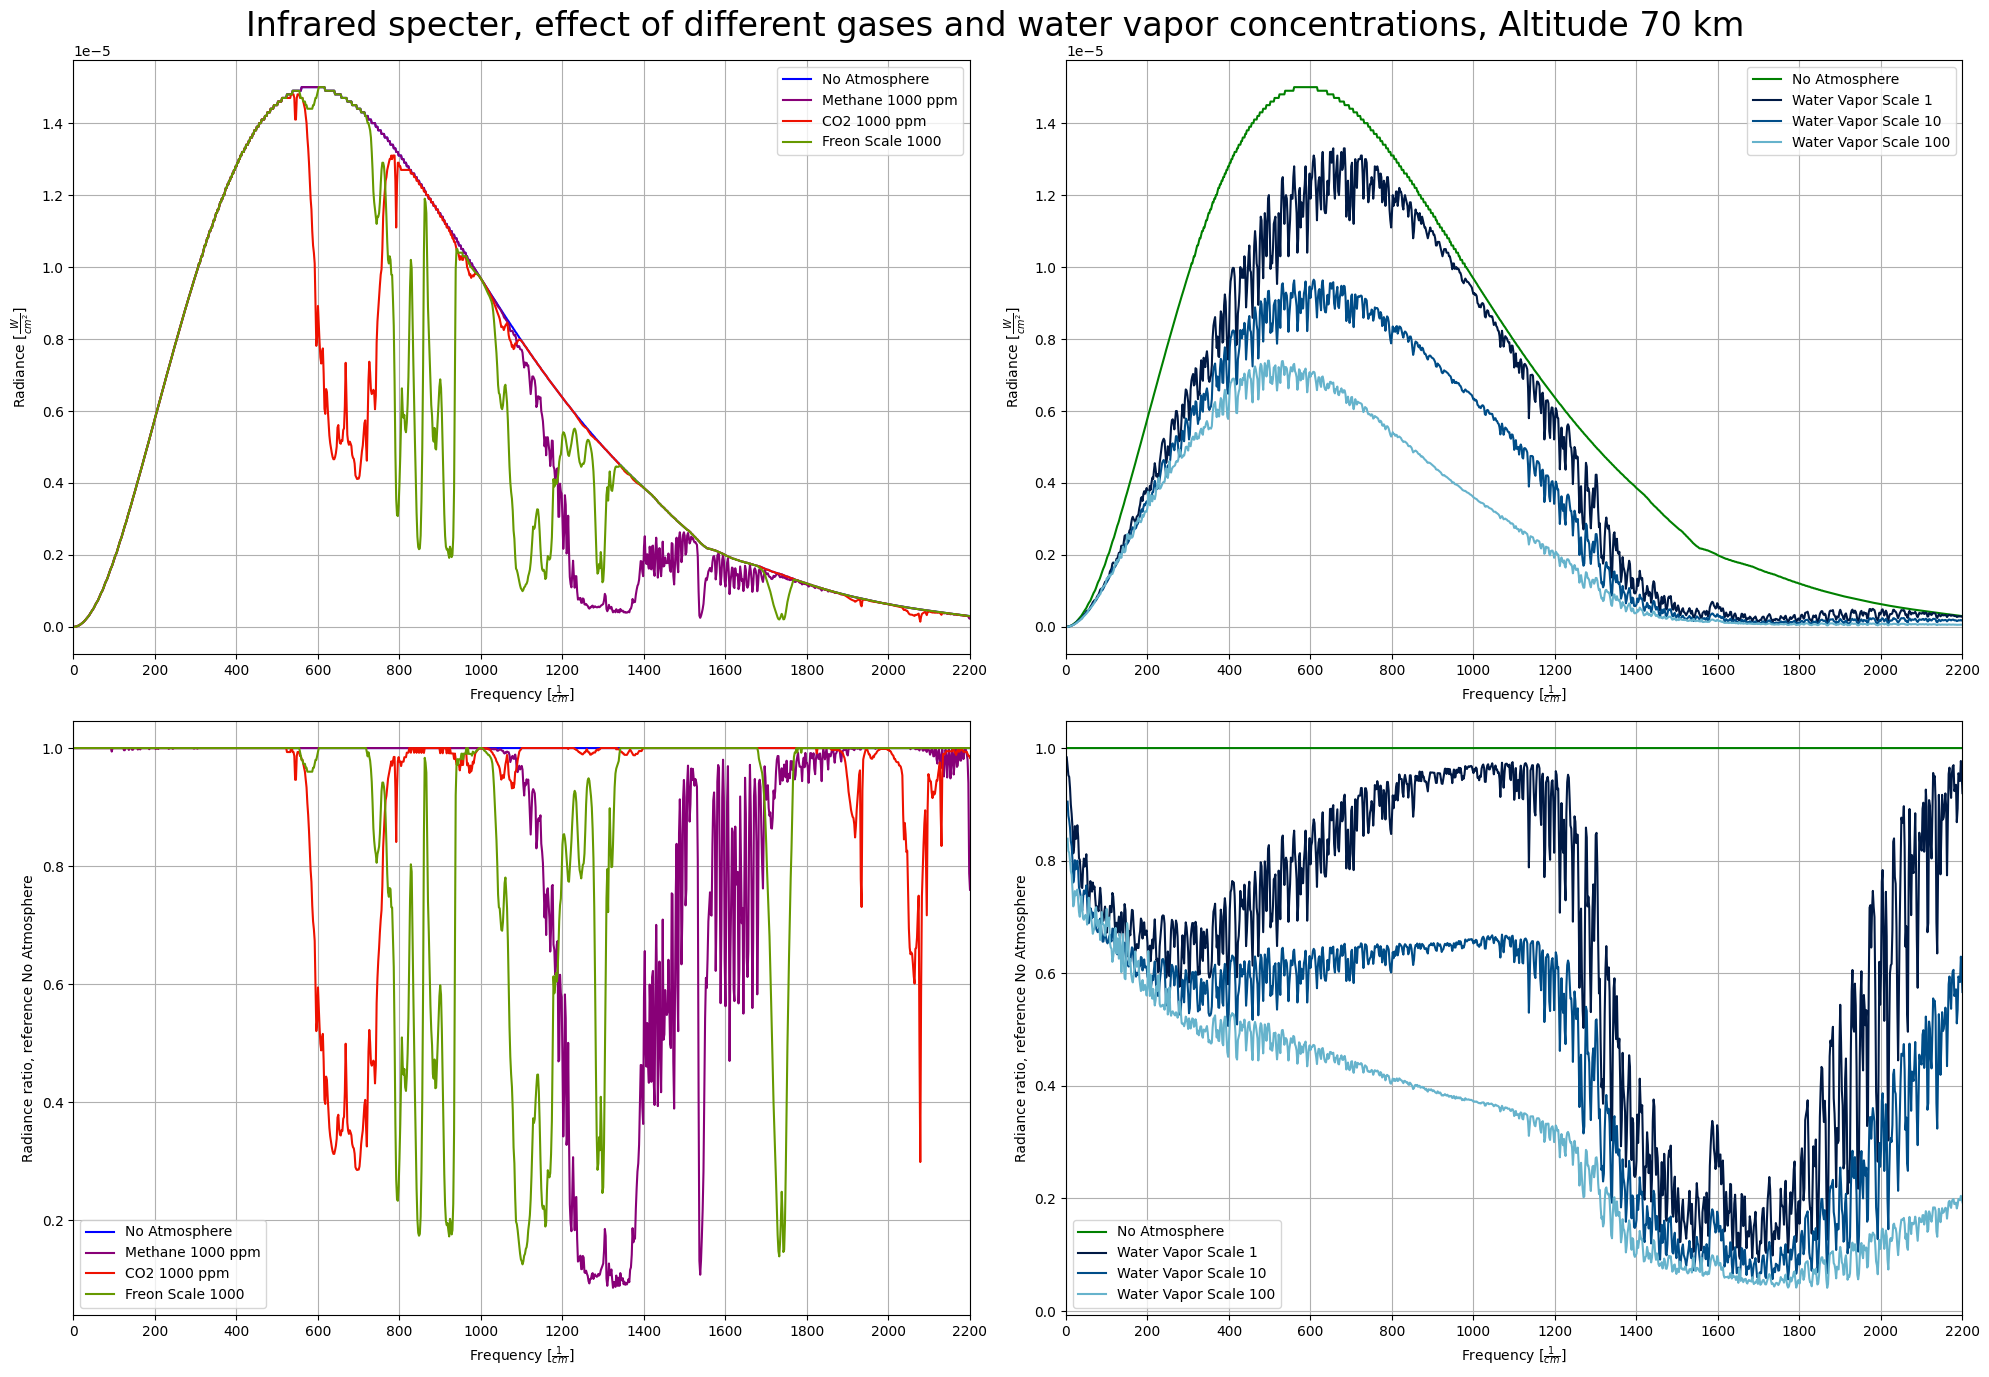

In [283]:
# Second part
Paths: list[list[str]] = [
    ['modtran/Blank.txt', 'No Atmosphere'],
    ['modtran/CH4.txt', 'Methane 1000 ppm'],
    ['modtran/CO2.txt', 'CO2 1000 ppm'],
    ['modtran/Freon.txt', 'Freon Scale 1000']
]

WaterPaths: list[list[str]] = [
    ['modtran/Blank.txt', 'No Atmosphere'],
    ['modtran/Water1.txt', 'Water Vapor Scale 1'],
    ['modtran/Water10.txt', 'Water Vapor Scale 10'],
    ['modtran/Water100.txt', 'Water Vapor Scale 100']
]

Blank = read_file('modtran/Blank.txt')

cmap2 = create_custom_cmap('brg', start=0, stop=0.8)
norm2= mcolors.Normalize(vmin=0, vmax=len(Paths) - 1)

cmap3 = create_custom_cmap('ocean', start=0, stop=0.8)
norm3 = mcolors.Normalize(vmin=0, vmax=len(WaterPaths) - 1)

xtickStep = 200

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Infrared specter, effect of different gases and water vapor concentrations, Altitude 70 km', fontsize=24)
# First subplot
for i, path in enumerate(Paths):
    data = read_file(path[0])
    color = cmap2(norm2(i))
    ax1.plot(data[:, 0], data[:, 8], label=path[1], color=color)

ax1.grid()
ax1.set_xlabel(r'Frequency [$\frac{1}{cm}$]'), ax1.set_xticks(np.arange(0, max(data[:, 0]) + 1, xtickStep)), ax1.set_xlim(0, 2200)
ax1.set_ylabel(r'Radiance [$\frac{W}{cm^2}$]')
ax1.legend(loc='upper right')

# Second subplot
for i, path in enumerate(WaterPaths):
    data = read_file(path[0])
    color = cmap3(norm3(i))
    ax2.plot(data[:, 0], data[:, 8], label=path[1], color=color)

ax2.grid()
ax2.set_xlabel(r'Frequency [$\frac{1}{cm}$]'), ax2.set_xticks(np.arange(0, max(data[:, 0]) + 1, xtickStep)), ax2.set_xlim(0, 2200)
ax2.set_ylabel(r'Radiance [$\frac{W}{cm^2}$]')
ax2.legend(loc='upper right')

# Third subplot
for i, path in enumerate(Paths):
    data = read_file(path[0])
    color = cmap2(norm2(i))
    ax3.plot(data[:, 0], data[:, 8] / Blank[:, 8], label=path[1], color=color)

ax3.grid()
ax3.set_xlabel(r'Frequency [$\frac{1}{cm}$]'), ax3.set_xticks(np.arange(0, max(data[:, 0]) + 1, xtickStep)), ax3.set_xlim(0, 2200)
ax3.set_ylabel('Radiance ratio, reference No Atmosphere')
ax3.legend(loc='lower left')

# Fourth subplot
for i, path in enumerate(WaterPaths):
    data = read_file(path[0])
    color = cmap3(norm3(i))
    ax4.plot(data[:, 0], data[:, 8] / Blank[:, 8], label=path[1], color=color)

ax4.grid()
ax4.set_xlabel(r'Frequency [$\frac{1}{cm}$]'), ax4.set_xticks(np.arange(0, max(data[:, 0]) + 1, xtickStep)), ax4.set_xlim(0, 2200)
ax4.set_ylabel('Radiance ratio, reference No Atmosphere')
ax4.legend(loc='lower left')

plt.tight_layout()
plt.show()